# load shear maps

In [140]:
import numpy as np
import treecorr 
import healpy as hp
import pyfits as pf

path = '/global/cfs/cdirs/des/mgatti/Dirac_mocks/shear_maps_runsL_run110_nside512_noiserel8.npy'
dict_temp = np.load(path,allow_pickle=True).item()
conf = dict()
conf['nside'] = 512
t = 3

dec,ra = IndexToDeclRa(dict_temp[rel][t+1]['pix'],conf['nside'])


m = pf.open('/global/cfs/cdirs/des/mgatti/Dirac_mocks/runsM/run063/gg_52_512.fits')
l = pf.open('/global/cfs/cdirs/des/mgatti/Dirac_mocks/runsM/run063/lens_80_512.fits')


g1 =  m[1].data['g1'][dict_temp[rel][t+1]['pix']]
g2 =  -m[1].data['g2'][dict_temp[rel][t+1]['pix']]
d  =  l[1].data['T'][dict_temp[rel][t+1]['pix']]


'''


rel = 1
from Moments_analysis import convert_to_pix_coord, IndexToDeclRa
e1 = dict_temp[rel][t+1]['e1']
e2 = dict_temp[rel][t+1]['e2']


'''

"\n\n\nrel = 1\nfrom Moments_analysis import convert_to_pix_coord, IndexToDeclRa\ne1 = dict_temp[rel][t+1]['e1']\ne2 = dict_temp[rel][t+1]['e2']\n\n\n"

16777216.0

array([[-0.06620017, -0.06205338]])

In [126]:


e = np.vstack([g1,g2]).T
R = []
en = []
Q = []
for i in range(len(e)):
    R_ = np.zeros((2,2))
    R00 = -2000 + np.random.normal(0,20)
    R01 =  np.random.normal(0,0.4)
    R_[0,0] = R00
    R_[1,1] = R00
    R_[0,1] = R01
    R_[1,0] = R01

    R.append(R_)
    
    std_e = np.sqrt(1./-R00)
    en_ = np.vstack([np.random.normal(0,std_e,1),np.random.normal(0,std_e,1)])
    en.append((e[i]+en_.T).T)
    Q_ = np.matmul((R_),(e[i]+en_.T).T)
    Q.append(Q_)
    
en = np.array(en)[:,:,0]
R = np.array(R)
Q = np.array(Q)[:,:,0]

In [133]:
import matplotlib.pyplot as plt
std_e

0.01115915741092674

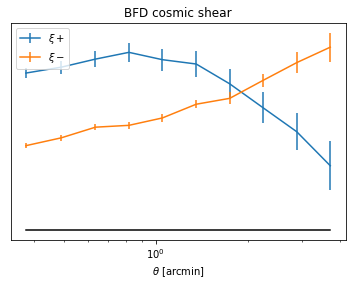

In [127]:
Nbins = 10

min_theta = 20/60.
max_theta = 250./60.
number_of_cores = 64
bin_slope = 0.3


conf = {'nbins': Nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units': 'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores  # parameter for treecorr
            }
import treecorr

cat_a = treecorr.Catalog(ra=ra,dec=dec, g1=en[:,0], g2=en[:,1],ra_units='deg', dec_units='deg',npatch=100)
gg = treecorr.GGCorrelation(conf,var_method='jackknife')
gg.process(cat_a)


t = gg.meanr

plt.errorbar(t,t*gg.xip,t*np.sqrt(gg.cov.diagonal())[:Nbins],label = r'$\xi+$')
plt.errorbar(t,t*gg.xim,t*np.sqrt(gg.cov.diagonal())[Nbins:],label = r'$\xi-$')
plt.errorbar(t,0*t*gg.xip,color='black')
plt.xscale('log')
plt.xlabel(r'$\theta$ [arcmin]')
plt.title('BFD cosmic shear')
plt.yticks([])
plt.legend()


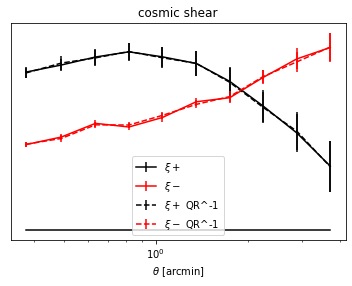

In [132]:
Nbins = 10

min_theta = 20/60.
max_theta = 250./60.
number_of_cores = 64
bin_slope = 0.3


conf = {'nbins': Nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units': 'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores  # parameter for treecorr
            }
import treecorr

R_mean = np.mean(R,axis=0)

e_ = np.matmul(np.linalg.inv(R_mean),Q.T)

cat_a = treecorr.Catalog(ra=ra,dec=dec, g1=e_[0,:], g2=e_[1,:],ra_units='deg', dec_units='deg',npatch=100)
gg1 = treecorr.GGCorrelation(conf,var_method='jackknife')
gg1.process(cat_a)


t = gg.meanr

plt.errorbar(t,t*gg.xip,t*np.sqrt(gg.cov.diagonal())[:Nbins],label = r'$\xi+$', color='black')
plt.errorbar(t,t*gg.xim,t*np.sqrt(gg.cov.diagonal())[Nbins:],label = r'$\xi-$', color='red')
plt.errorbar(t,t*gg1.xip,t*np.sqrt(gg1.cov.diagonal())[:Nbins],label = r'$\xi+$ QR^-1', color='black',linestyle='dashed')
plt.errorbar(t,t*gg1.xim,t*np.sqrt(gg1.cov.diagonal())[Nbins:],label = r'$\xi-$ QR^-1', color='red',linestyle='dashed')
plt.errorbar(t,0*t*gg.xip,color='black')
plt.xscale('log')
plt.xlabel(r'$\theta$ [arcmin]')
plt.title('cosmic shear')
plt.yticks([])
plt.legend()


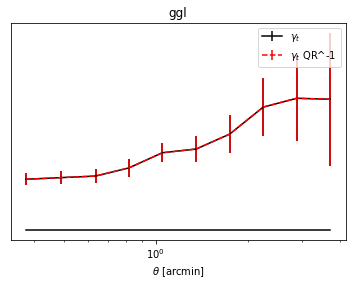

In [147]:
Nbins = 10

min_theta = 20/60.
max_theta = 250./60.
number_of_cores = 64
bin_slope = 0.3


conf = {'nbins': Nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units': 'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores  # parameter for treecorr
            }
import treecorr

R_mean = np.mean(R,axis=0)

e_ = np.matmul(np.linalg.inv(R_mean),Q.T)

cat_a = treecorr.Catalog(ra=ra,dec=dec, g1=e_[0,:], g2=e_[1,:],ra_units='deg', dec_units='deg',npatch=100)
cat_b = treecorr.Catalog(ra=ra,dec=dec, w = 1-d ,ra_units='deg', dec_units='deg',npatch=100)
gg1 = treecorr.NGCorrelation(conf,var_method='jackknife')
gg1.process(cat_b,cat_a)


t = gg1.meanr

plt.errorbar(t,t*gg1.xi,t*np.sqrt(gg1.cov.diagonal())[:Nbins],label = r'$\gamma_t$', color='black')
#plt.errorbar(t,t*gg.xim,t*np.sqrt(gg.cov.diagonal())[Nbins:],label = r'$\xi-$', color='red')
plt.errorbar(t,t*gg1.xi,t*np.sqrt(gg1.cov.diagonal())[:Nbins],label = r'$\gamma_t$ QR^-1', color='red',linestyle='dashed')
#plt.errorbar(t,t*gg1.xim,t*np.sqrt(gg1.cov.diagonal())[Nbins:],label = r'$\xi-$ QR^-1', color='red',linestyle='dashed')
plt.errorbar(t,0*t*gg.xip,color='black')
plt.xscale('log')
plt.xlabel(r'$\theta$ [arcmin]')
plt.title('ggl')
plt.yticks([])
plt.legend()


In [156]:
all_ = dict()
all_['sources'] = dict()
all_['lenses'] = dict()
all_['sources']['RA'] = ra
all_['sources']['DEC'] = dec
all_['sources']['Q1'] = Q[:,0]
all_['sources']['Q2'] = Q[:,1]
all_['sources']['R11'] = R[:,0,0]
all_['sources']['R22'] = R[:,1,1]
all_['sources']['R12'] = R[:,0,1]
all_['sources']['e1'] = en[:,0]
all_['sources']['e2'] = en[:,1]
all_['lenses']['RA'] = ra
all_['lenses']['DEC'] = dec
all_['lenses']['w'] = 1-d 
np.save('/global/cfs/cdirs/des/mgatti/BFD_fake_catalog',all_)
